In [1]:
#Import Library that will be used
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
#Input the dataset
X_train = pd.read_csv('dataset-after-preparation\X_train.csv')
X_test = pd.read_csv('dataset-after-preparation\X_test.csv')
y_train = pd.read_csv('dataset-after-preparation\y_train.csv')
y_test = pd.read_csv('dataset-after-preparation\y_test.csv')
X_valid = pd.read_csv('dataset-after-preparation\X_valid.csv')
y_valid = pd.read_csv('dataset-after-preparation\y_valid.csv')


#input the selected feature by using variance threshold
VT_selected_feature_Zoo = joblib.load('VT_selected_feature_Zoo.pkl')
pso_linear = joblib.load('PSO-selected-feature/pso-linear.pkl')
pso_rbf = joblib.load('PSO-selected-feature/pso-rbf.pkl')
pso_poly = joblib.load('PSO-selected-feature/pso-poly.pkl')

In [3]:
#put the selected feature on the dataset
X_train_VT = X_train[VT_selected_feature_Zoo]
X_train_linear = X_train[pso_linear]
X_train_rbf = X_train[pso_rbf]
X_train_poly = X_train[pso_poly]

In [4]:
X_train_VT

,209720_s_at,217653_x_at,215604_x_at,214594_x_at,207953_at,216609_at,205292_s_at,208864_s_at,217679_x_at,206056_x_at,...,221728_x_at,208719_s_at,214370_at,206529_x_at,206025_s_at,212657_s_at,202499_s_at,209351_at,211719_x_at,214218_s_at
0,3.070971,2.143948,2.448449,2.318584,2.276682,2.184782,3.040806,3.340347,2.509717,2.055980,...,2.379151,2.389606,1.876823,1.674760,2.310929,2.840391,1.990811,2.005734,2.977765,1.707757
1,3.256913,2.192104,2.598688,2.519168,2.397743,1.994434,3.134083,3.217164,2.635188,2.043305,...,2.324294,2.203478,1.863487,1.859301,2.066188,2.846777,1.742856,2.515425,2.623609,1.725235
2,3.151953,2.557625,2.899922,2.949728,2.739890,2.126646,2.655731,2.921777,3.010178,2.547760,...,2.496956,2.203444,2.178651,1.862315,2.200731,2.754910,1.970567,2.392195,2.568849,1.689167
3,3.135153,2.131548,2.470550,2.156956,2.329255,2.064197,3.040357,3.200554,2.482408,2.013541,...,2.975522,2.723166,1.765023,1.684457,1.972539,2.621454,1.636193,2.371066,2.419884,2.614415
4,2.839373,2.301768,2.804243,2.784016,2.552104,1.903286,2.411785,2.977480,2.949615,2.443250,...,2.506481,2.148033,1.906013,2.020068,2.372995,2.843741,2.029599,2.320348,2.750661,1.924025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3.023559,2.284004,2.825340,2.754746,2.613344,1.764710,2.379167,2.902023,2.728322,2.466654,...,2.287103,2.459610,1.860208,1.638666,2.058465,2.663446,1.731018,2.416373,2.166555,1.513259
126,3.299427,2.360078,2.687610,2.799913,2.506660,2.515608,3.135428,3.342398,2.856345,2.265811,...,3.035673,2.289845,2.478638,2.311450,2.057571,2.853325,2.156795,2.135665,2.926642,2.459417
127,3.184152,2.370920,2.815919,2.750996,2.587275,2.412423,2.939161,3.357292,2.947863,2.422262,...,2.313259,2.371716,2.832474,1.887824,2.363249,3.185290,2.836760,2.268364,2.930293,1.689884
128,3.185631,2.597250,2.811467,2.788203,2.630920,2.166725,3.187932,3.364191,3.005933,2.245423,...,2.412690,2.364395,1.743820,1.629251,2.073299,2.659584,1.691010,2.642236,2.776883,1.776972


In [5]:
X_train_linear

,215604_x_at,207953_at,205292_s_at,208864_s_at,206056_x_at,217715_x_at,215208_x_at,209860_s_at,215600_x_at,208736_at,...,206825_at,210495_x_at,217678_at,204446_s_at,216442_x_at,210873_x_at,221728_x_at,214370_at,202499_s_at,211719_x_at
0,2.448449,2.276682,3.040806,3.340347,2.055980,2.127704,2.164784,3.203413,2.622790,2.962485,...,2.712632,3.038450,2.603191,2.566473,3.004754,1.839884,2.379151,1.876823,1.990811,2.977765
1,2.598688,2.397743,3.134083,3.217164,2.043305,2.129820,2.103818,3.094224,2.729315,3.037713,...,2.763923,2.648978,2.068898,2.389717,2.666887,1.812563,2.324294,1.863487,1.742856,2.623609
2,2.899922,2.739890,2.655731,2.921777,2.547760,2.603566,2.464359,2.648497,3.060396,2.760023,...,2.774664,2.698464,2.017579,2.375439,2.657317,1.826530,2.496956,2.178651,1.970567,2.568849
3,2.470550,2.329255,3.040357,3.200554,2.013541,2.035916,2.079336,3.147632,2.598989,2.888836,...,3.017850,2.543855,1.926370,2.208655,2.528641,1.730481,2.975522,1.765023,1.636193,2.419884
4,2.804243,2.552104,2.411785,2.977480,2.443250,2.388174,2.565927,2.687686,3.024575,2.598510,...,2.663587,2.698767,2.093151,2.310720,2.717106,2.050460,2.506481,1.906013,2.029599,2.750661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2.825340,2.613344,2.379167,2.902023,2.466654,2.539680,2.351849,2.518010,2.944739,2.632998,...,2.724516,2.176133,2.029836,2.068126,2.319001,1.800025,2.287103,1.860208,1.731018,2.166555
126,2.687610,2.506660,3.135428,3.342398,2.265811,2.276846,2.335839,3.105218,2.853140,3.040034,...,2.440176,2.913549,2.384489,2.421271,2.856492,1.813275,3.035673,2.478638,2.156795,2.926642
127,2.815919,2.587275,2.939161,3.357292,2.422262,2.373526,2.316409,2.987704,2.947528,2.980321,...,2.708860,2.939938,2.323402,2.788217,2.882444,2.251288,2.313259,2.832474,2.836760,2.930293
128,2.811467,2.630920,3.187932,3.364191,2.245423,2.372416,2.357660,3.177911,3.007312,3.051888,...,3.063470,2.859593,2.119676,2.493351,2.817271,1.847822,2.412690,1.743820,1.691010,2.776883


In [6]:
X_train_rbf

,207953_at,208864_s_at,206056_x_at,217715_x_at,215907_at,208736_at,216858_x_at,213313_at,213619_at,206169_x_at,...,205114_s_at,206306_at,206825_at,210495_x_at,217678_at,206529_x_at,206025_s_at,212657_s_at,202499_s_at,209351_at
0,2.276682,3.340347,2.055980,2.127704,2.308751,2.962485,2.543185,2.680211,3.072206,2.279534,...,2.749964,2.574015,2.712632,3.038450,2.603191,1.674760,2.310929,2.840391,1.990811,2.005734
1,2.397743,3.217164,2.043305,2.129820,2.452289,3.037713,2.570337,2.894044,3.093077,2.357783,...,2.713724,2.832097,2.763923,2.648978,2.068898,1.859301,2.066188,2.846777,1.742856,2.515425
2,2.739890,2.921777,2.547760,2.603566,2.878970,2.760023,2.943418,2.530854,2.619605,2.859172,...,2.474368,2.549350,2.774664,2.698464,2.017579,1.862315,2.200731,2.754910,1.970567,2.392195
3,2.329255,3.200554,2.013541,2.035916,2.413238,2.888836,2.471666,2.867544,3.094007,2.317495,...,2.341640,2.566636,3.017850,2.543855,1.926370,1.684457,1.972539,2.621454,1.636193,2.371066
4,2.552104,2.977480,2.443250,2.388174,2.715590,2.598510,2.918390,2.406597,2.679148,2.670600,...,2.275726,2.444691,2.663587,2.698767,2.093151,2.020068,2.372995,2.843741,2.029599,2.320348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2.613344,2.902023,2.466654,2.539680,2.555104,2.632998,2.791295,2.309154,2.599494,2.506543,...,2.174523,2.167927,2.724516,2.176133,2.029836,1.638666,2.058465,2.663446,1.731018,2.416373
126,2.506660,3.342398,2.265811,2.276846,2.561677,3.040034,2.691135,2.647308,3.215015,2.566753,...,2.543023,2.322743,2.440176,2.913549,2.384489,2.311450,2.057571,2.853325,2.156795,2.135665
127,2.587275,3.357292,2.422262,2.373526,2.668831,2.980321,2.843190,2.650054,2.996348,2.599577,...,2.634553,2.183292,2.708860,2.939938,2.323402,1.887824,2.363249,3.185290,2.836760,2.268364
128,2.630920,3.364191,2.245423,2.372416,2.664808,3.051888,2.820196,2.932713,3.210484,2.573426,...,2.427160,1.815855,3.063470,2.859593,2.119676,1.629251,2.073299,2.659584,1.691010,2.642236


In [7]:
X_train_poly

,209720_s_at,217653_x_at,215604_x_at,207953_at,216609_at,205292_s_at,206056_x_at,217715_x_at,215907_at,208635_x_at,...,217767_at,205681_at,220330_s_at,203980_at,204438_at,206276_at,210873_x_at,206025_s_at,209351_at,211719_x_at
0,3.070971,2.143948,2.448449,2.276682,2.184782,3.040806,2.055980,2.127704,2.308751,3.383922,...,3.104534,2.516336,1.718225,2.884567,2.891323,2.375566,1.839884,2.310929,2.005734,2.977765
1,3.256913,2.192104,2.598688,2.397743,1.994434,3.134083,2.043305,2.129820,2.452289,3.413334,...,3.406460,2.118981,1.731631,2.656215,2.278549,2.502782,1.812563,2.066188,2.515425,2.623609
2,3.151953,2.557625,2.899922,2.739890,2.126646,2.655731,2.547760,2.603566,2.878970,3.072047,...,3.372300,1.937575,1.555930,2.552427,2.348192,2.874297,1.826530,2.200731,2.392195,2.568849
3,3.135153,2.131548,2.470550,2.329255,2.064197,3.040357,2.013541,2.035916,2.413238,3.490745,...,3.344381,1.823550,1.593530,2.426463,2.112787,2.392568,1.730481,1.972539,2.371066,2.419884
4,2.839373,2.301768,2.804243,2.552104,1.903286,2.411785,2.443250,2.388174,2.715590,3.178183,...,3.134896,2.248471,1.919866,2.675052,2.145536,2.293020,2.050460,2.372995,2.320348,2.750661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3.023559,2.284004,2.825340,2.613344,1.764710,2.379167,2.466654,2.539680,2.555104,3.091178,...,3.054480,1.962402,1.549157,2.327027,1.980934,2.568829,1.800025,2.058465,2.416373,2.166555
126,3.299427,2.360078,2.687610,2.506660,2.515608,3.135428,2.265811,2.276846,2.561677,3.374319,...,3.327464,2.286434,1.729594,2.488295,2.600786,2.493076,1.813275,2.057571,2.135665,2.926642
127,3.184152,2.370920,2.815919,2.587275,2.412423,2.939161,2.422262,2.373526,2.668831,3.356049,...,3.315738,2.887205,1.896135,3.073461,2.878983,2.611951,2.251288,2.363249,2.268364,2.930293
128,3.185631,2.597250,2.811467,2.630920,2.166725,3.187932,2.245423,2.372416,2.664808,3.426723,...,3.163844,1.998136,1.767885,2.723479,2.672532,2.260344,1.847822,2.073299,2.642236,2.776883


In [8]:
print("X_train_VT shape: ", X_train_VT.shape)
print("X_train_linear shape: ", X_train_linear.shape)
print("X_train_rbf shape: ", X_train_rbf.shape)
print("X_train_poly shape: ", X_train_poly.shape)

X_train_VT shape:  (130, 1090)
X_train_linear shape:  (130, 546)
X_train_rbf shape:  (130, 520)
X_train_poly shape:  (130, 559)


## Before Tuning with Hyperparameter

##### Default Parameter on Linear Kernel

In [9]:
### create model
clf_linear = SVC(kernel='linear')

### cross-validation evaluation
cv_linear = cross_val_score(clf_linear, X_train_linear, y_train.values.ravel(), scoring='accuracy', cv=5)

### Show CV result
print("%0.2f [LINEAR] accuracy with a standard deviation of %0.2f" % (cv_linear.mean(), cv_linear.std()))

0.72 [LINEAR] accuracy with a standard deviation of 0.07


##### Default Parameter on RBF Kernel

In [10]:
### create model
clf_rbf = SVC(kernel='rbf')

### cross-validation evaluation
cv_rbf = cross_val_score(clf_rbf, X_train_rbf, y_train.values.ravel(), scoring='accuracy', cv=5)

### Show CV result
print("%0.2f [RBF] accuracy with a standard deviation of %0.2f" % (cv_rbf.mean(), cv_rbf.std()))

0.67 [RBF] accuracy with a standard deviation of 0.10


##### Default Parameter on Poly Kernel

In [11]:
### create model
clf_poly = SVC(kernel='poly')

### cross-validation evaluation
cv_poly = cross_val_score(clf_poly, X_train_poly, y_train.values.ravel(), scoring='accuracy', cv=5)

### Show CV result
print("%0.2f [POLY] accuracy with a standard deviation of %0.2f" % (cv_poly.mean(), cv_poly.std()))

0.66 [POLY] accuracy with a standard deviation of 0.09


## Tuning Parameter with GridSearchCV

##### Linear Kernel

In [12]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_linear, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_linear.pkl")

selected_kernel_linear = grid.best_params_['kernel']
selected_C_linear = grid.best_params_['C']
best_params_linear_ht = grid.best_params_
model_looks_linear_HT = grid.best_estimator_

joblib.dump(best_params_linear_ht, "params_pkl/best_params_linear_ht.pkl")
joblib.dump(model_looks_linear_HT, "params_pkl/model_looks_linear_HT.pkl")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.538 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.538 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.538 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.500 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.500 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.577 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.769 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.846 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.692 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.846 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.654 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;,

['params_pkl/model_looks_linear_HT.pkl']

##### On RBF Kernel

In [13]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf'],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_rbf, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_rbf.pkl")

selected_kernel_rbf = grid.best_params_['kernel']
selected_C_rbf = grid.best_params_['C']
selected_gamma_rbf = grid.best_params_['gamma']
best_params_rbf_ht = grid.best_params_
model_looks_rbf_HT = grid.best_estimator_

joblib.dump(best_params_rbf_ht, "params_pkl/best_params_rbf_ht.pkl")
joblib.dump(model_looks_rbf_HT, "params_pkl/model_looks_rbf_HT.pkl")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 3/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 3/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;

['params_pkl/model_looks_rbf_HT.pkl']

##### On Poly Kernel 

In [14]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['poly'],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_poly, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_poly.pkl")

selected_kernel_poly = grid.best_params_['kernel']
selected_C_poly = grid.best_params_['C']
selected_gamma_poly = grid.best_params_['gamma']
selected_degree_poly = grid.best_params_['degree']
best_params_poly_HT = grid.best_params_
model_looks_poly_HT = grid.best_estimator_

joblib.dump(best_params_poly_HT, "params_pkl/best_params_poly_ht.pkl")
joblib.dump(model_looks_poly_HT, "params_pkl/model_looks_poly_HT.pkl")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=2, gamma=auto,

[CV 2/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.577 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.808 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=scale, kernel=poly;, score=0.692 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=scale, kernel=poly;, score=0.577 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=scale, kernel=poly;, score=0.808 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.1, degree=6, gamma=auto, kernel=poly;, score=0.692 total time=   0.0s
[CV 2/5] END C=0.1, degree=6, gamma=auto, kernel=poly;, score=0.577 total time=   0.0s
[CV 3/5] END C=0.1, degree=6, gamma=au

[CV 1/5] END C=10, degree=3, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=auto, kernel=poly;, score=0.808 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=scale, kernel=poly;, score=0.808 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=auto, kernel=poly;, score=0.692 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=auto, kernel=p

[CV 1/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.692 total time=   0.0s
[CV 2/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.577 total time=   0.0s
[CV 3/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.808 total time=   0.0s
[CV 4/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.615 total time=   0.0s
[CV 5/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.577 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.577 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.808 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.692 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.615 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=1000, degree=1, 

['params_pkl/model_looks_poly_HT.pkl']

### Best Parameter 

##### On Linear Kernel

In [15]:
# print best parameter after tuning
print("Selected Kernel: ", selected_kernel_linear)
print("Selected C: ", selected_C_linear)
# print how our model looks after hyper-parameter tuning
print("Model Looks: ", model_looks_linear_HT)

Selected Kernel:  linear
Selected C:  0.1
Model Looks:  SVC(C=0.1, kernel='linear')


##### On RBF Kernel

In [16]:
# print best parameter after tuning
print("Selected Kernel: ", selected_kernel_rbf)
print("Selected C: ", selected_C_rbf)
print("Selected Gamma: ", selected_gamma_rbf)
# print how our model looks after hyper-parameter tuning
print("Model Looks: ", model_looks_rbf_HT)

Selected Kernel:  rbf
Selected C:  10
Selected Gamma:  auto
Model Looks:  SVC(C=10, gamma='auto')


In [17]:
# print best parameter after tuning
print("Selected Kernel: ", selected_kernel_poly)
print("Selected C: ", selected_C_poly)
print("Selected Gamma: ", selected_gamma_poly)
print("Selected Degree: ", selected_degree_poly)
# print how our model looks after hyper-parameter tuning
print("Model Looks: ", model_looks_poly_HT)

Selected Kernel:  poly
Selected C:  0.001
Selected Gamma:  auto
Selected Degree:  6
Model Looks:  SVC(C=0.001, degree=6, gamma='auto', kernel='poly')


### CV with Tuned Hyperparamater

In [18]:
#(Linear)

print("==========================[LINEAR]==============================")
cross_val_score_linear = cross_val_score(model_looks_linear_HT, X_train_linear, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f"[BEFORE] Accuracy Score Linear: ", (cv_linear.mean(), cv_linear.std()))
print(f'[AFTER] Accuracy Score Linear:', cross_val_score_linear.mean(), cross_val_score_linear.std())

print("==========================[RBF]==============================")

print(f"[BEFORE] Accuracy Score RBF: ", (cv_rbf.mean(), cv_rbf.std()))
cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, X_train_rbf, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f'[AFTER] Accuracy Score RBF:', cross_val_score_rbf.mean(), cross_val_score_rbf.std())

print("==========================[Poly]==============================")

print(f"[BEFORE] Accuracy Score Poly: ", (cv_poly.mean(), cv_poly.std()))
cross_val_score_poly = cross_val_score(model_looks_poly_HT, X_train_poly, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f'[AFTER] Accuracy Score Poly:', cross_val_score_poly.mean(), cross_val_score_poly.std())

==========================[LINEAR]==============================
[BEFORE] Accuracy Score Linear:  (0.7153846153846154, 0.07133552688842848)
[AFTER] Accuracy Score Linear: 0.7461538461538463 0.10204999354939695
==========================[RBF]==============================
[BEFORE] Accuracy Score RBF:  (0.6692307692307692, 0.10204999354939691)
[AFTER] Accuracy Score RBF: 0.7076923076923077 0.09294650748918903
==========================[Poly]==============================
[BEFORE] Accuracy Score Poly:  (0.6615384615384615, 0.08565791327430804)
[AFTER] Accuracy Score Poly: 0.7230769230769231 0.09850960365281307


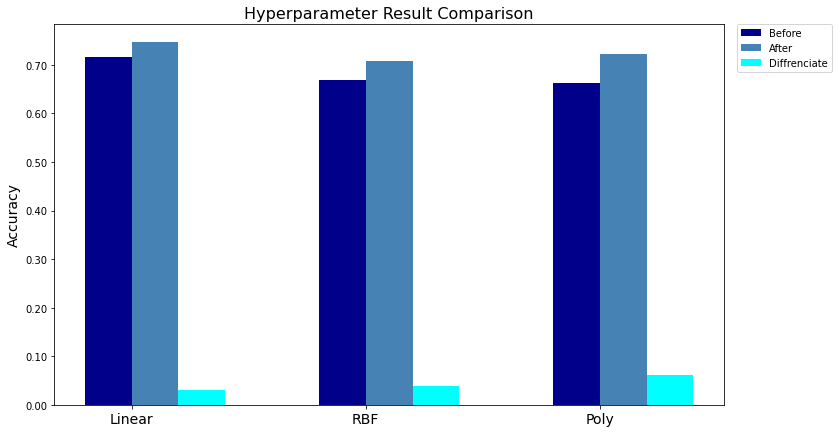

In [19]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline

name = ['Linear in Default', 'Linear After Hyperparameter Tuning', 'RBF in Default', 
        'RBF After Hyperparameter Tuning', 'Poly in Default',
        'Poly After Hyperparameter Tuning']

kernel_accuracy = [cv_linear.mean(), cross_val_score_linear.mean(),
                  cv_rbf.mean(), cross_val_score_rbf.mean(),
                  cv_poly.mean(), cross_val_score_poly.mean()]

name = ['Linear', 'RBF', 'Poly']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='darkblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='steelblue')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')
# diff_HT = ax.bar(x + width/2, diff_all, width, label='Diffrence', color='red')

ax.set_title('Hyperparameter Result Comparison', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
plt.savefig('analysis-fig/hyperparameter-tuning.png')
plt.show()

In [20]:
print("Before HyperParameter (Linear): ", before_HT[0])
print("After HyperParameter: (Linear)", after_HT[0])
print("Diff HyperParameter: (Linear)", diff_HT[0])
print("============================")
print("Before HyperParameter (RBF): ", before_HT[1])
print("After HyperParameter: (RBF)", after_HT[1])
print("Diff HyperParameter: (RBF)", diff_HT[1])
print("============================")
print("Before HyperParameter (Poly): ", before_HT[2])
print("After HyperParameter: (Poly)", after_HT[2])
print("Diff HyperParameter: (Poly)", diff_HT[2])

Before HyperParameter (Linear):  0.7153846153846154
After HyperParameter: (Linear) 0.7461538461538463
Diff HyperParameter: (Linear) 0.030769230769230882
Before HyperParameter (RBF):  0.6692307692307692
After HyperParameter: (RBF) 0.7076923076923077
Diff HyperParameter: (RBF) 0.03846153846153855
Before HyperParameter (Poly):  0.6615384615384615
After HyperParameter: (Poly) 0.7230769230769231
Diff HyperParameter: (Poly) 0.06153846153846154


### Summary of Hyperparameter Tuning

In [21]:
print("Top selected parameter after Hyperparameter Tuning")
print("Linear: ", best_params_linear_ht)
print("RBF: ", best_params_rbf_ht)
print("Poly: ", best_params_poly_HT)

Top selected parameter after Hyperparameter Tuning
Linear:  {'C': 0.1, 'kernel': 'linear'}
RBF:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Poly:  {'C': 0.001, 'degree': 6, 'gamma': 'auto', 'kernel': 'poly'}


In [22]:
print("Accuracy with Linear Kernel: ", cross_val_score_linear.mean())
print("Accuracy with RBF Kernel: ", cross_val_score_rbf.mean())
print("Accuracy with Poly Kernel: ", cross_val_score_poly.mean())

Accuracy with Linear Kernel:  0.7461538461538463
Accuracy with RBF Kernel:  0.7076923076923077
Accuracy with Poly Kernel:  0.7230769230769231
